# Visualization

## Dependencies

In [2]:
from pathlib import Path
import os
wd=Path().absolute().parent
os.chdir(wd) #change the working dirctory to parant

from modules.func import *
import matplotlib.pyplot as plt
import numpy as np
# from modules.encoder import l
import pickle
from pathlib import Path
from tqdm import tqdm

all_data_dir=Path('./data/alldata/')
datalist=[x for x in all_data_dir.iterdir()]

## Basic Info

In [3]:
# ---load a normal mouse's data
data_dir=datalist[2] # load data
sample_name=str(data_dir).split('/')[-1]
print(f'mouse name:{sample_name}')

position,spikes=load_data(data_dir)

# basic info

neuron_idx=50
time_bin_size=1/3 #second
num_time_bins,num_cells = spikes.shape

print(f"number of neurons in this mouse:{num_cells} \n")
print(f"loaded data: neuron {neuron_idx}")
print(f"time bin size:{round(time_bin_size,2)}s")
print(f"total time bins:{num_time_bins} ({round(num_time_bins*time_bin_size/60,2)}min)")
print(f"number of spikes:{sum(spikes[:,neuron_idx])}")

mouse name:M45_042718_OF
number of neurons in this mouse:66 

loaded data: neuron 50
time bin size:0.33s
total time bins:5394 (29.97min)
number of spikes:18


# Ridge Regression Results

## Penalty Range 2e3~2e12 with 4 grid parts

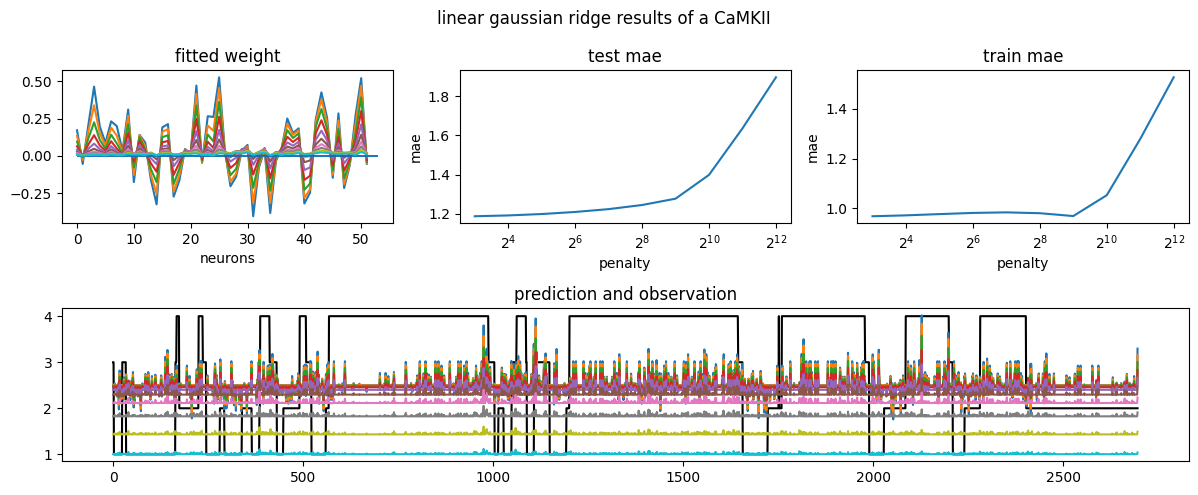

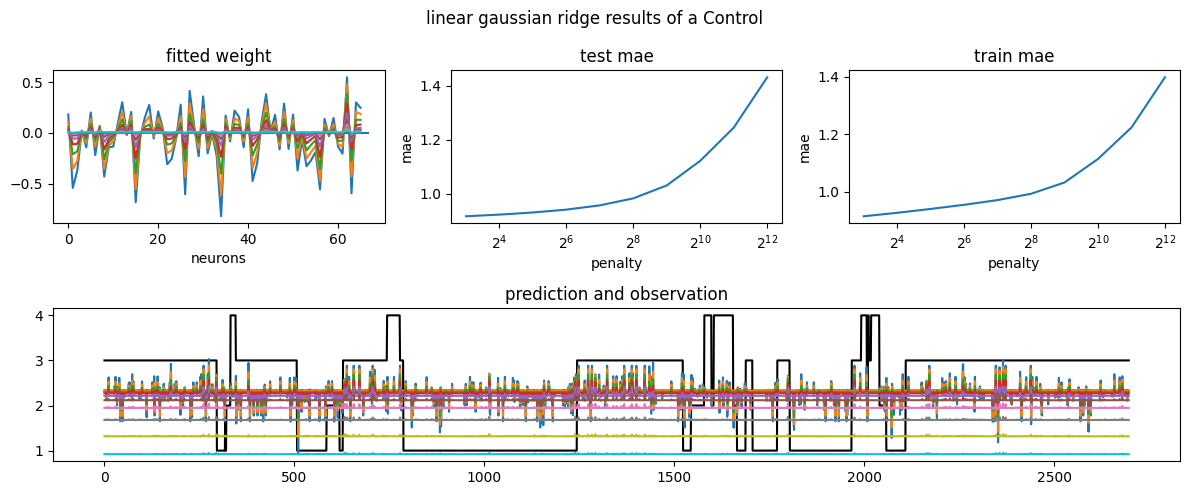

In [8]:
### Two samples' visualization
for mouse_id in [0,2]:
    plt.figure(figsize=(12,5))
    data_name=str(datalist[mouse_id]).split('/')[-1]
    sample_type = "CaMKII" if "CaMKII" in data_name else "Control"

    with open(Path(f"output/data/linear_gaussian_ridge/lgr_predict_{data_name}_withLargerPenalty.pickle"),"rb") as f:
        theta_prediction_penalty,binned_position_test,binned_position_train,failed_penalty=pickle.load(f) # load theta(fitted weight), prediction, penealty, and observed position test data
        
    # fig,axes=plt.subplots(ncols=3,figsize=(12,4))
    mae_list=[]
    mae_train_list=[]
    penalty_list=[]

    # ---visualize the observation
    plt.subplot(212)
    plt.plot(binned_position_test,c="black")

    for theta,prediction,prediction_train,penalty in theta_prediction_penalty:
        #---plot for theta and penalty
        plt.subplot(231)
        plt.hlines([0]*len(theta),0,len(theta),lw=.1)
        plt.plot(theta[1:],label=penalty)
        plt.title("fitted weight")
        plt.xlabel("neurons")
        
        mae_list.append(cal_mae(prediction,binned_position_test))
        mae_train_list.append(cal_mae(prediction_train,binned_position_train))
        penalty_list.append(penalty )

        #---visualize the prediction
        plt.subplot(212)
        plt.plot(prediction)
        plt.title("prediction and observation")


    #---plot for prediction error
    plt.subplot(232)
    plt.semilogx(penalty_list,mae_list,base=2)
    plt.title("test mae")
    plt.xlabel("penalty")
    plt.ylabel("mae")

    plt.subplot(233)
    plt.semilogx(penalty_list,mae_train_list,base=2)
    plt.title("train mae")
    plt.xlabel("penalty")
    plt.ylabel("mae")

    plt.suptitle(f"linear gaussian ridge results of a {sample_type}")
    plt.tight_layout()



100%|██████████| 12/12 [00:00<00:00, 18.19it/s]


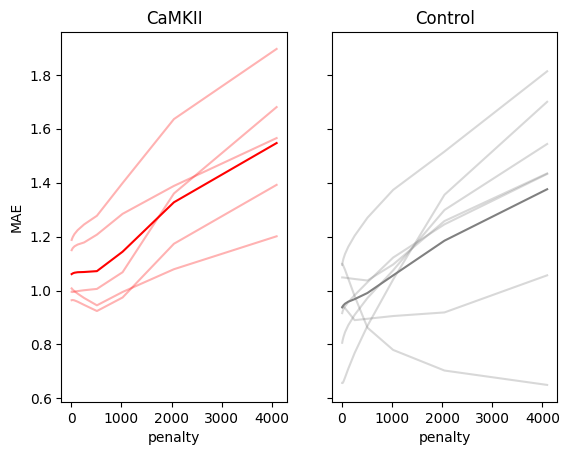

In [5]:
fig,axes=plt.subplots(ncols=2,sharey=True)

mae_list_camkII=[]
mae_list_control=[]
for data_dir in tqdm(datalist):
    data_name=str(data_dir).split('/')[-1]
    with open(Path(f"output/data/linear_gaussian_ridge/lgr_predict_{data_name}_withLargerPenalty.pickle"),"rb") as f:
        theta_prediction_penalty,binned_position_test,binned_position_train,failed_penalty=pickle.load(f) # load theta(fitted weight), prediction, penealty, and observed position test data
   
    mae_list=[]
    penalty_list=[]
    for theta,prediction,prediction_train,penalty in theta_prediction_penalty:
        mae_list.append(cal_mae(prediction,binned_position_test))
        penalty_list.append(penalty )

    if "CaMKII" in data_name:
        sample_type = "CaMKII"
        mae_list_camkII.append(mae_list)
        axes[0].plot(penalty_list,mae_list,c="r",alpha=.3)
        axes[0].set_title(sample_type)
        axes[0].set_xlabel("penalty")
    else:
        sample_type = "Control"
        mae_list_control.append(mae_list)
        axes[1].plot(penalty_list,mae_list,c="gray",alpha=.3)
        axes[1].set_title(sample_type)
        axes[1].set_xlabel("penalty")

axes[0].set_ylabel("MAE")

#---plot for average mae with different penalty
avg_mae_camkII=np.average(mae_list_camkII,axis=0)
avg_mae_control=np.average(mae_list_control,axis=0)
axes[0].plot(penalty_list,avg_mae_camkII,c="r")
axes[1].plot(penalty_list,avg_mae_control,c="gray")


## Penalty Range 2e3~2e12 with 4 horizontal/vertical parts

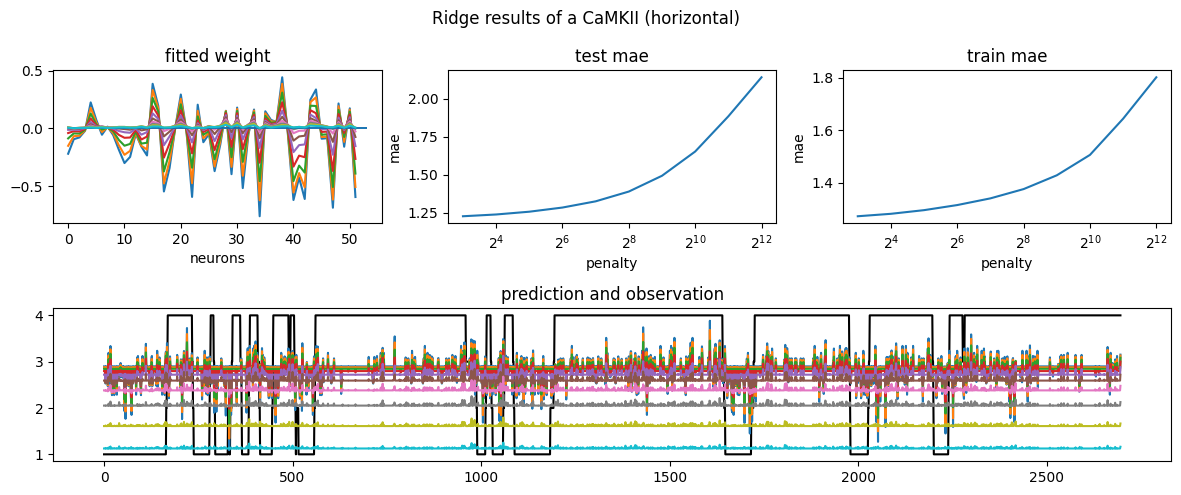

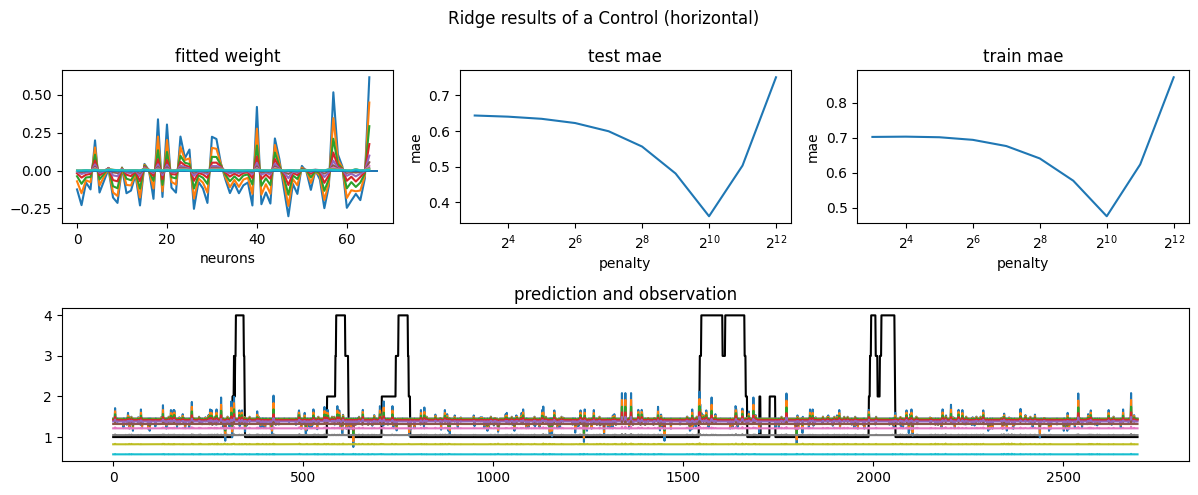

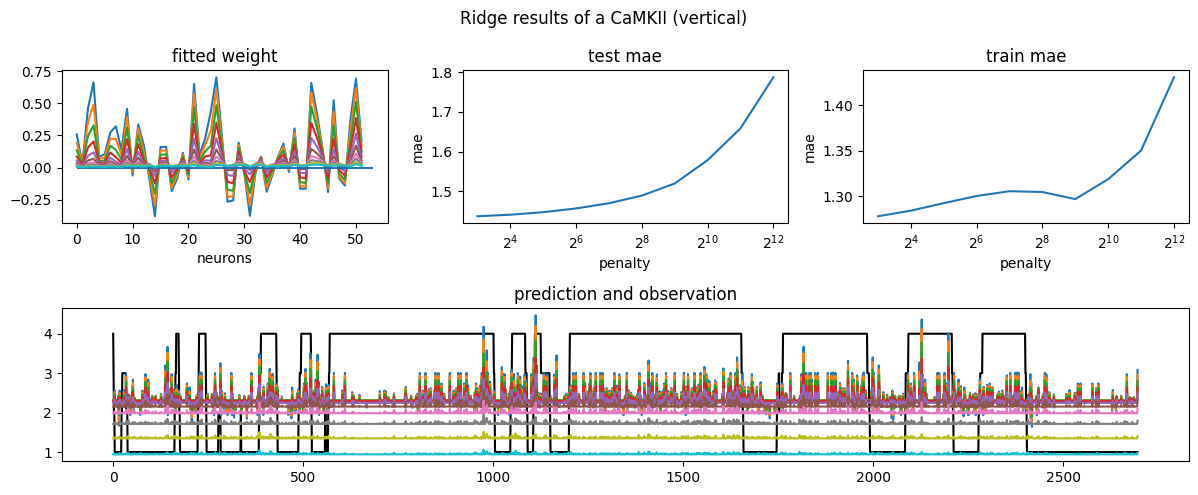

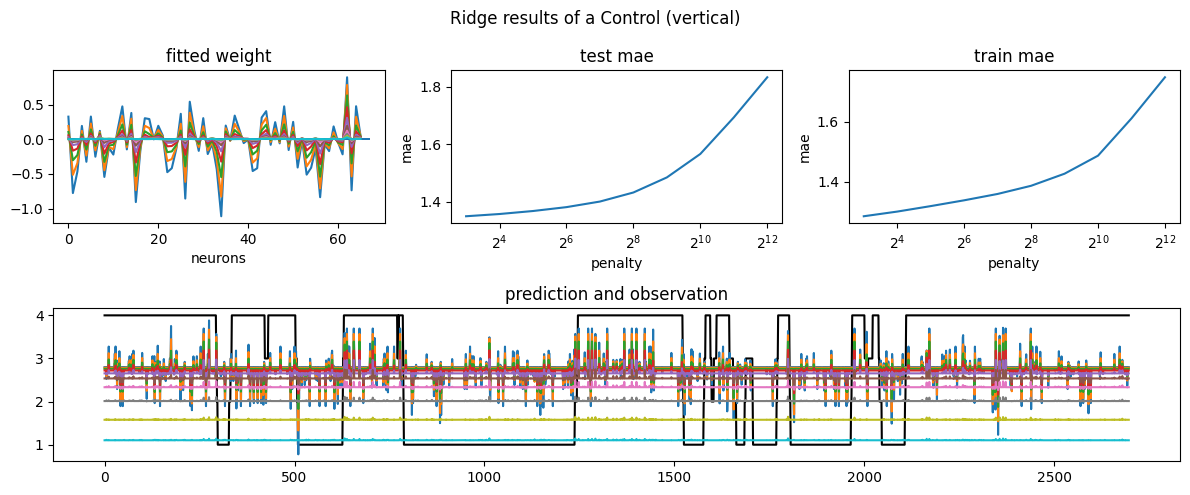

In [8]:
### Two samples' visualization
for partition_type in ["horizontal","vertical"]:
    n_parts=4
    for mouse_id in [0,2]:
        plt.figure(figsize=(12,5))
        data_name=str(datalist[mouse_id]).split('/')[-1]
        sample_type = "CaMKII" if "CaMKII" in data_name else "Control"

        with open(Path(f"rr_predict_{data_name}_{partition_type}nParts{n_parts}.pickle"),"rb") as f:
            results_list,y_test,_=pickle.load(f) # load theta(fitted weight), prediction, penealty, and observed position test data
            
        # fig,axes=plt.subplots(ncols=3,figsize=(12,4))
        mae_list=[]
        mae_train_list=[]
        penalty_list=[]

        # ---visualize the observation
        plt.subplot(212)
        plt.plot(binned_position_test,c="black")

        for theta,prediction,prediction_train,penalty in theta_prediction_penalty:
            #---plot for theta and penalty
            plt.subplot(231)
            plt.hlines([0]*len(theta),0,len(theta),lw=.1)
            plt.plot(theta[1:],label=penalty)
            plt.title("fitted weight")
            plt.xlabel("neurons")
            
            mae_list.append(cal_mae(prediction,binned_position_test))
            mae_train_list.append(cal_mae(prediction_train,binned_position_train))
            penalty_list.append(penalty )

            #---visualize the prediction
            plt.subplot(212)
            plt.plot(prediction)
            plt.title("prediction and observation")


        #---plot for prediction error
        plt.subplot(232)
        plt.semilogx(penalty_list,mae_list,base=2)
        plt.title("test mae")
        plt.xlabel("penalty")
        plt.ylabel("mae")

        plt.subplot(233)
        plt.semilogx(penalty_list,mae_train_list,base=2)
        plt.title("train mae")
        plt.xlabel("penalty")
        plt.ylabel("mae")

        plt.suptitle(f"Ridge results of a {sample_type} ({partition_type})")
        plt.tight_layout()



## P-values

In [9]:
partition_type="vertical"
n_parts=4
mouse_id=0
plt.figure(figsize=(12,5))
data_name=str(datalist[mouse_id]).split('/')[-1]
sample_type = "CaMKII" if "CaMKII" in data_name else "Control"

with open(Path(f"output/data/ridge_regression/rr_predict_{data_name}_{partition_type}nParts{n_parts}.pickle"),"rb") as f:
    results_list,y_test,_=pickle.load(f) # load theta(fitted weight), prediction, penealty, and observed position test data

results_list[0]["individual sig"]

[array([[1.]]),
 array([[0.99848131]]),
 array([[0.53587739]]),
 array([[0.99946207]]),
 array([[0.99999885]]),
 array([[0.81764648]]),
 array([[0.72806718]]),
 array([[0.99976147]]),
 array([[0.98846533]]),
 array([[0.92737591]]),
 array([[1.]]),
 array([[0.13475682]]),
 array([[0.99999826]]),
 array([[0.9749492]]),
 array([[0.00295335]]),
 array([[1.98464342e-07]]),
 array([[0.99892465]]),
 array([[0.99987559]]),
 array([[3.40102815e-05]]),
 array([[0.06145762]]),
 array([[0.99826709]]),
 array([[0.00814905]]),
 array([[1.]]),
 array([[0.91966175]]),
 array([[0.99642476]]),
 array([[0.99284713]]),
 array([[1.]]),
 array([[1.]]),
 array([[5.90130511e-15]]),
 array([[7.03524386e-23]]),
 array([[0.99999961]]),
 array([[0.06190732]]),
 array([[4.4914007e-12]]),
 array([[0.10012391]]),
 array([[0.99842058]]),
 array([[0.00098129]]),
 array([[0.0387645]]),
 array([[0.80596763]]),
 array([[0.99988298]]),
 array([[0.23667756]]),
 array([[1.]]),
 array([[3.03843799e-07]]),
 array([[2.3905991e

<Figure size 1200x500 with 0 Axes>